In [1]:
import numpy as np
import pandas as pd

from tensorflow import keras
import tensorflow as tf
print(tf.__version__)
print(keras.__version__)

2.2.0
2.3.0-tf


### 1. load data

In [8]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [9]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
for idx in range(10) :
    print(y_train[idx])

5
0
4
1
9
2
1
3
1
4


In [11]:
# 이진분류가 아니기 때문에 원핫 인코딩을 해야함
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [12]:
for idx in range(10) :
    print(y_train[idx])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [13]:
# 1차원으로 reshape
x_train = x_train.reshape(60000, 784)
x_test  = x_test.reshape(10000, 784)

In [14]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

### create model

In [15]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, activation='sigmoid', input_shape=(784,) , name='input'))

model.add(keras.layers.Dense(128, activation='sigmoid', name='hidden1'))
model.add(keras.layers.Dense(64 , activation='sigmoid', name='hidden2'))
model.add(keras.layers.Dense(32 , activation='sigmoid', name='hidden3'))

model.add(keras.layers.Dense(10 , activation='softmax', name='output'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


### model compile

In [19]:
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = optimizer,
              loss      = 'categorical_crossentropy',
              metrics   = ['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Dense)                (None, 256)               200960    
_________________________________________________________________
hidden1 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


### model fit

In [25]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
600/600 [==============================] - 2s 4ms/step - loss: 1.0930 - accuracy: 0.6982 - val_loss: 1.0666 - val_accuracy: 0.7036
Epoch 2/10
600/600 [==============================] - 3s 4ms/step - loss: 1.0255 - accuracy: 0.7221 - val_loss: 1.0027 - val_accuracy: 0.7415
Epoch 3/10
600/600 [==============================] - 3s 4ms/step - loss: 0.9636 - accuracy: 0.7529 - val_loss: 0.9417 - val_accuracy: 0.7704
Epoch 4/10
600/600 [==============================] - 3s 4ms/step - loss: 0.9037 - accuracy: 0.7794 - val_loss: 0.8823 - val_accuracy: 0.8049
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.8454 - accuracy: 0.8063 - val_loss: 0.8262 - val_accuracy: 0.8239
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.7894 - accuracy: 0.8255 - val_loss: 0.7688 - val_accuracy: 0.8424
Epoch 7/10
600/600 [==============================] - 2s 4ms/step - loss: 0.7342 - accuracy: 0.8454 - val_loss: 0.7154 - val_accuracy: 0.8527
Epoch 

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### 평가

In [33]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5828 - accuracy: 0.8843


[0.5827834606170654, 0.8842999935150146]

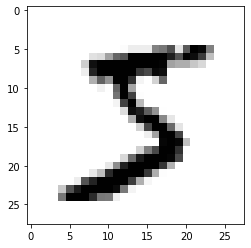

In [34]:
import matplotlib.pyplot as plt

x_train = x_train.reshape(60000, 28, 28)

plt.figure()
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

### 2. load data

In [19]:
(x_train, y_train) , (x_test , y_test) = keras.datasets.mnist.load_data()

In [20]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [21]:
y_train = keras.utils.to_categorical(y_train , 10)
y_test = keras.utils.to_categorical(y_test , 10)

In [22]:
x_train = x_train.reshape(60000 , 784)
x_test  = x_test.reshape(10000 , 784)

In [23]:
x_train.shape , y_train.shape , x_test.shape, y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

In [24]:
from sklearn.model_selection import train_test_split

x_train , x_val , y_train , y_val = train_test_split(x_train, y_train , 
                                                     test_size = 0.3 ,
                                                     random_state = 100)

In [25]:
x_train.shape , x_val.shape , y_train.shape , y_val.shape

((42000, 784), (18000, 784), (42000, 10), (18000, 10))

###  create model
- 함수형 API

In [26]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential , Model

input   = Input(shape=(784, ) , name='input')

hidden1 = Dense(256  , activation='sigmoid' , name='hidden1' )(input)
hidden2 = Dense(128  , activation='sigmoid' , name='hidden2' )(hidden1)
hidden3 = Dense(64  ,  activation='sigmoid' , name='hidden3' )(hidden2)
hidden4 = Dense(32  ,  activation='sigmoid' , name='hidden4' )(hidden3)

output  = Dense(10  ,  activation='softmax' , name='output' )(hidden4)

model   = Model(inputs=[input] , outputs=[output])

In [27]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
hidden1 (Dense)              (None, 256)               200960    
_________________________________________________________________
hidden2 (Dense)              (None, 128)               32896     
_________________________________________________________________
hidden3 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden4 (Dense)              (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_____________________________________________________

### model compile

In [28]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer, 
              loss      = 'categorical_crossentropy' , 
              metrics   = ['accuracy'] ) 

### model fit

In [29]:
history = model.fit(x_train, y_train , batch_size = 128 , epochs = 10 , validation_data=(x_val, y_val) )

Epoch 1/10
329/329 [==============================] - 1s 3ms/step - loss: 2.3318 - accuracy: 0.1168 - val_loss: 2.2970 - val_accuracy: 0.1528
Epoch 2/10
329/329 [==============================] - 1s 3ms/step - loss: 2.2950 - accuracy: 0.1162 - val_loss: 2.2927 - val_accuracy: 0.1140
Epoch 3/10
329/329 [==============================] - 1s 3ms/step - loss: 2.2905 - accuracy: 0.1136 - val_loss: 2.2878 - val_accuracy: 0.1142
Epoch 4/10
329/329 [==============================] - 1s 3ms/step - loss: 2.2854 - accuracy: 0.1212 - val_loss: 2.2823 - val_accuracy: 0.1289
Epoch 5/10
329/329 [==============================] - 1s 3ms/step - loss: 2.2794 - accuracy: 0.1308 - val_loss: 2.2757 - val_accuracy: 0.1744
Epoch 6/10
329/329 [==============================] - 1s 3ms/step - loss: 2.2721 - accuracy: 0.1574 - val_loss: 2.2674 - val_accuracy: 0.1888
Epoch 7/10
329/329 [==============================] - 1s 3ms/step - loss: 2.2629 - accuracy: 0.1901 - val_loss: 2.2566 - val_accuracy: 0.1752
Epoch 

In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

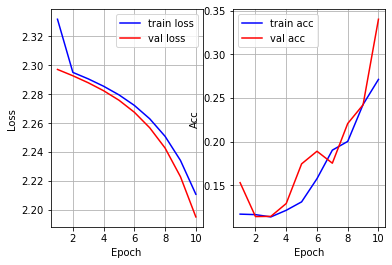

In [32]:
import matplotlib.pyplot as plt

loss     = history_dict['loss'] 
val_loss = history_dict['val_loss']

fig = plt.figure()
ax01 = fig.add_subplot(1, 2 , 1) 

epochs = range(1, len(loss)+1)

ax01.plot(epochs , loss ,     color='blue' , label='train loss')
ax01.plot(epochs , val_loss , color='red'  , label='val loss')
ax01.set_xlabel('Epoch')
ax01.set_ylabel('Loss')
ax01.grid()
ax01.legend()


acc     = history_dict['accuracy'] 
val_acc = history_dict['val_accuracy']

ax02 = fig.add_subplot(1, 2 , 2) 
ax02.plot(epochs , acc ,     color='blue' , label='train acc')
ax02.plot(epochs , val_acc , color='red'  , label='val acc')
ax02.set_xlabel('Epoch')
ax02.set_ylabel('Acc')
ax02.grid()
ax02.legend()

In [ ]:
model.evaluate(x_test , y_test)
